# Chapter 5 - Cue combination
---

## Example of using Markdown and $\LaTeX$

Write some text in Markdown. It's easy!

You like equations? Great! Learn some $\LaTeX$! Like so:

$\mu_{post} = w_{1}x_{1} + w_{2}x_{2} = w_{1}x_{1} + (1 - w_{1})x_{2} \text{ where } w_{1} = \dfrac{J_1}{J_1 + J_2}$

$p(x_{1}|s) \sim N(s, \sigma_{1}^2) \text{ and } p(x_{2}|s) \sim N(s, \sigma_{2}^2)$  

Remember that $aX + bY \sim N(a\mu_{X} + b\mu_{Y}, a^2\sigma_{x}^2 + b^2\sigma_{Y}^2)$. Relating this axiom to our example and recalling that the mean of both likelihoods is $s$.  

For $p(\hat{s}|s)$, the mean will be $w_{1}s + (1 - w_{1})s = s$. For the variance, we can use the axiom regarding the sums of RVs:  

$\text{Var}[\hat{s}|s] = w_1^2\sigma_1^2 + w_{2}^2\sigma_2^2$. If you multiply everything out, this expression reduces to $\dfrac{1}{J_1 + J_2}$, which is equal to $\sigma_{post}^2$. In other words, ***in this cue combination problem, the variance of the PME distribution happens to be identical to the variance of the posterior. This is because the prior in this problem was chosen to be flat.*** When the prior is Gaussian, then the variance of the PME will differ from the variance of the posterior also for cue combination. 

---
## Let's program in Python

In [1]:
# Some standard imports
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = "retina"

---
### Problem X

When you turn your assignments in, you will be combining text-based explanations, equations, and code.

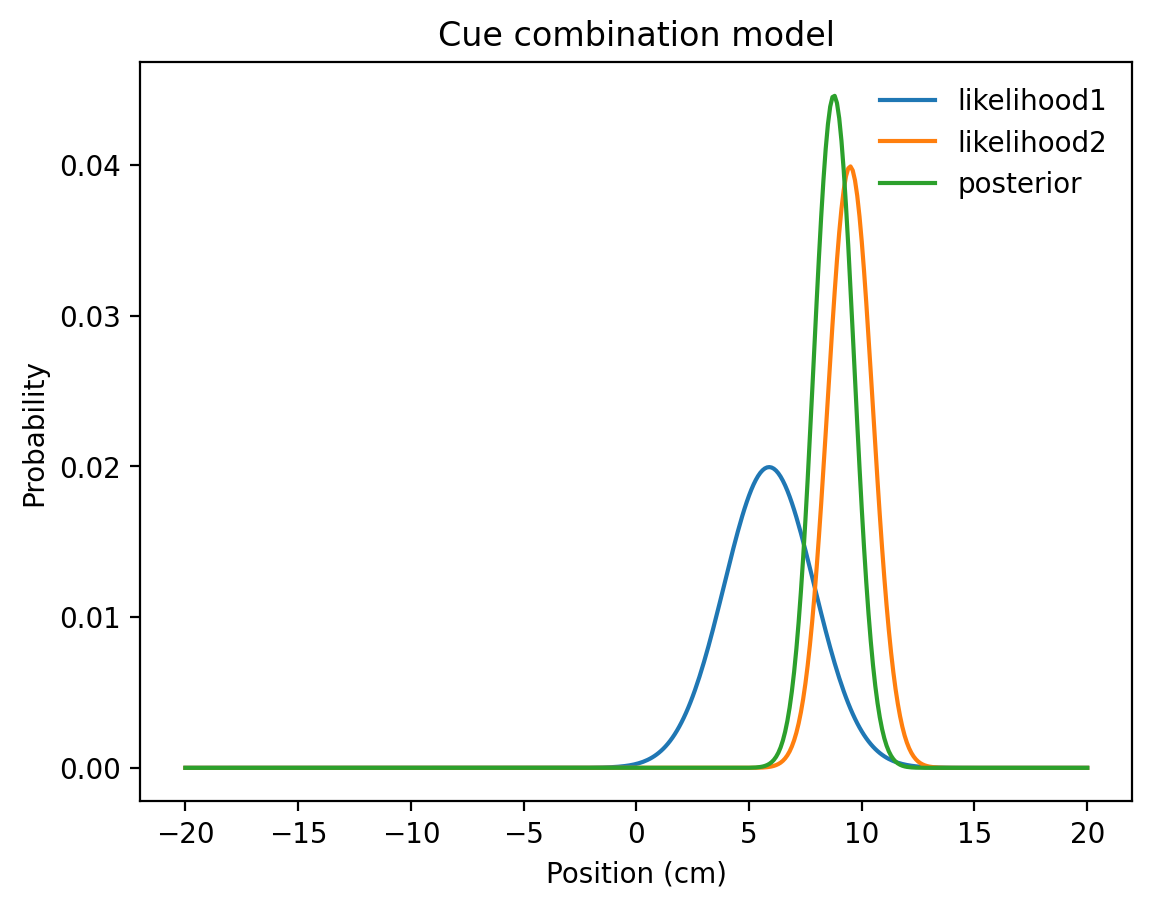

In [2]:
# Simulate your model
bin_width = 0.1    # interval size between possible stimuli
s = np.linspace(-20, 20, int(40 / bin_width) + 1)
s1, s2 = 5, 10
sigma1, sigma2 = 2, 1

# (a)-(d)
x1 = np.random.normal(s1, sigma1)
x2 = np.random.normal(s2, sigma2)

like1 = np.exp(-(s - x1)**2 / (2 * sigma1**2))
like1 = like1 / np.sum(like1)
like2 = np.exp(-(s - x2)**2 / (2 * sigma2**2))
like2 = like2 / np.sum(like2)
like_combined = like1 * like2
post = like_combined / np.sum(like_combined)

fig, ax = plt.subplots()
ax.plot(s, like1, label="likelihood1")
ax.plot(s, like2, label="likelihood2")
ax.plot(s, post, label="posterior")
ax.set(xlabel="Position (cm)", ylabel="Probability", title="Cue combination model")
ax.legend(frameon=False);

In [3]:
# (e) Numerically find PME
pme1 = s[np.argmax(post)]
print(f'When numerically estimated, the PME is equal to {pme1:.3f}.')

# (f) Use analytical solution for PME
J1 = 1 / sigma1**2
J2 = 1 / sigma2**2
w1 = J1 / (J1 + J2)
w2 = J2 / (J1 + J2)
pme2 = w1 * x1 + w2 * x2
print(f'When using the equation for the PME, the PME is equal to {pme2:.3f}.') 

When numerically estimated, the PME is equal to 8.800.
When using the equation for the PME, the PME is equal to 8.765.


In [4]:
# (g) Simulate in order to numerically compute observer's PME for 
# each pair of observations
n_draws = 100
x1_arr = np.random.normal(s1, sigma1, n_draws)
x2_arr = np.random.normal(s2, sigma2, n_draws)

pme = []
for i in range(n_draws):
    like1 = np.exp(-(s - x1_arr[i])**2 / (2 * sigma1**2))
    like2 = np.exp(-(s - x2_arr[i])**2 / (2 * sigma2**2))
    like1 = like1 / np.sum(like1)
    like2 = like2 / np.sum(like2)
    post = like1 * like2
    post = post / np.sum(post)
    
    # This is where we numerically compute PME on each trial
    pme.append(s[np.argmax(post)])

At different points in your answer, you will be adding more explanatory text. You will also reference some equations, like Bayes' rule:

$$P(A \mid B) = \dfrac{P(B \mid A)P(A)}{P(B)}$$

**Tip:** I find it easier (and faster) to work out the math using pen and paper before writing it out in $\LaTeX$.

In [5]:
# (h) Compare estimates from simulation versus analytical solution
pme_calc = np.mean(pme)
print(f'The calculated mean of the pme is {pme_calc:.3f}.')

pme_ana = w1 * s1 + w2 * s2
print(f'The analytical mean of the pme is {pme_ana:.3f}.')

The calculated mean of the pme is 9.071.
The analytical mean of the pme is 9.000.


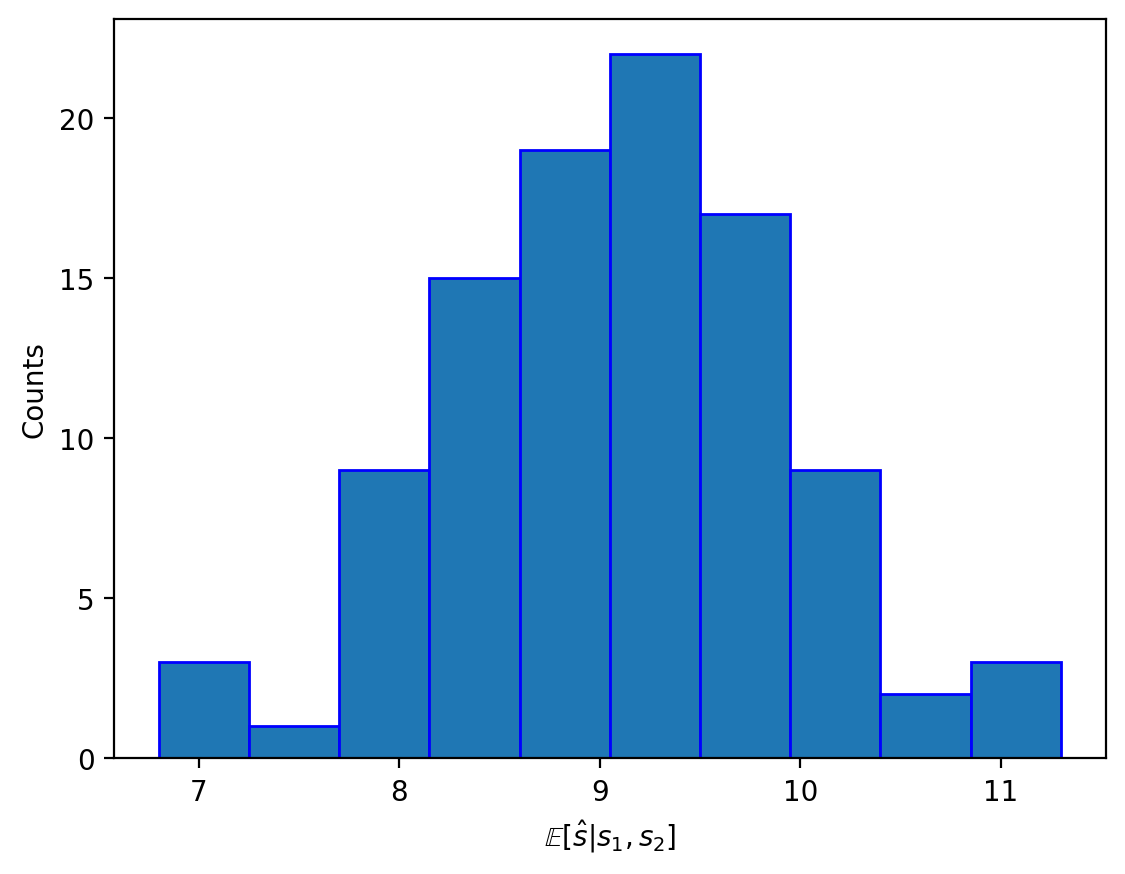

In [6]:
# (i) Plot distribution of PME
plt.hist(pme, edgecolor='b');
plt.xlabel('$\mathbb{E}[\hat{s}|s_1, s_2]$')
plt.ylabel('Counts');

---
## Reminders:

- Check out `jupyter_jhub` notebook
- Create borders around questions with Markdown '---'
- Go through saving notebook as .ipynb and .html file types and submitting assignments
    - Must first always "Restart Kernel and Run All Cells"! Make sure entire notebook runs without errors.
    - Download notebook: "File -> Download"
    - Next, click "File -> Save and Export Notebook As... -> HTML"
    - After you've saved both versions locally, you can upload to appropriate Canvas assignment